In [26]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Parte 1: Data Preprocessing

In [27]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Verificar las dimensiones de los datos
print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de x_train: (60000, 28, 28)
Dimensiones de y_train: (60000,)
Dimensiones de x_test: (10000, 28, 28)
Dimensiones de y_test: (10000,)


In [28]:
# Escalada de datos
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 28*28))
x_test_scaled = scaler.transform(x_test.reshape(-1, 28*28))

In [29]:
# Split de train y test sets
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
    x_train_scaled, y_train, test_size=0.2, random_state=42)

# x_train_split: 80% de los datos de entrenamiento
# x_test_split:  20% de los datos de testeo
# y_train_split: conjunto de datos de salida del entrenamiento
# y_test_split:  conjunto de datos de salida del testeto

# Parte 2: K-nn algorithm

In [30]:
# Crear una instancia del clasificador KNN con el número de vecinos deseado (por ejemplo, k=3)
k=3
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo con los datos de train
knn.fit(x_train_split, y_train_split)

# Realizar predicciones en el conjunto de testeo
y_pred = knn.predict(x_test_split)

# Calcular la precisión del modelo en el conjunto de testeo
accuracy = accuracy_score(y_test_split, y_pred)
print("Precisión en el conjunto de validación:", accuracy)

Precisión en el conjunto de validación: 0.9726666666666667


# Parte 3: Selection of an appropiate k-value

In [31]:
# Se repite la Parte 2 con k=2 para encontrar el mejor valor de k
k=2
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train_split, y_train_split)

y_pred = knn.predict(x_test_split)

accuracy = accuracy_score(y_test_split, y_pred)
print("Precisión en el conjunto de validación:", accuracy)

# por lo tanto el mejor valor de k es 3


Precisión en el conjunto de validación: 0.96425


# Parte 4: Model's evaluation

In [32]:
# Predicciones en el conjunto de test
y_pred = knn.predict(x_test_split)

# Calcular la precisión del modelo en el conjunto de test
accuracy = accuracy_score(y_test_split, y_pred)
print("Precisión en el conjunto de validación:", accuracy)

# Calcular la precisión del modelo en el conjunto de test
precision = precision_score(y_test_split, y_pred, average='weighted')
print("Precisión (weighted) en el conjunto de validación:", precision)

# Calcular el recall del modelo en el conjunto de test
recall = recall_score(y_test_split, y_pred, average='weighted')
print("Recall (weighted) en el conjunto de validación:", recall)

# Calcular el F1-score del modelo en el conjunto de test
f1 = f1_score(y_test_split, y_pred, average='weighted')
print("F1-score (weighted) en el conjunto de validación:", f1)

Precisión en el conjunto de validación: 0.96425
Precisión (weighted) en el conjunto de validación: 0.9648740878267289
Recall (weighted) en el conjunto de validación: 0.96425
F1-score (weighted) en el conjunto de validación: 0.9640939440552153


# Parte 5: Visualization of classified digits

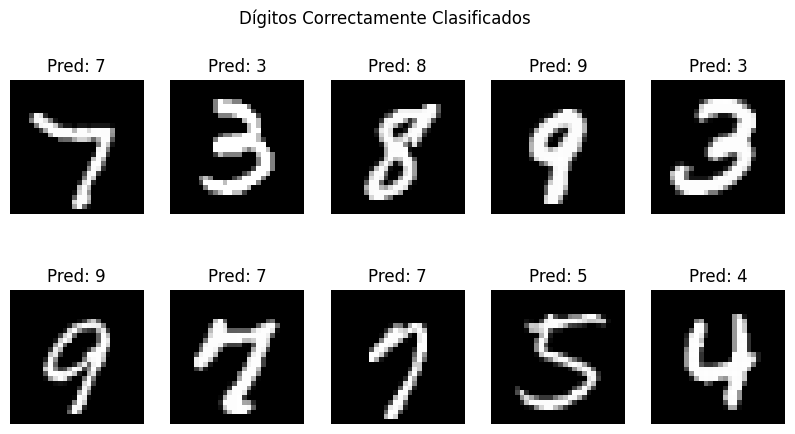

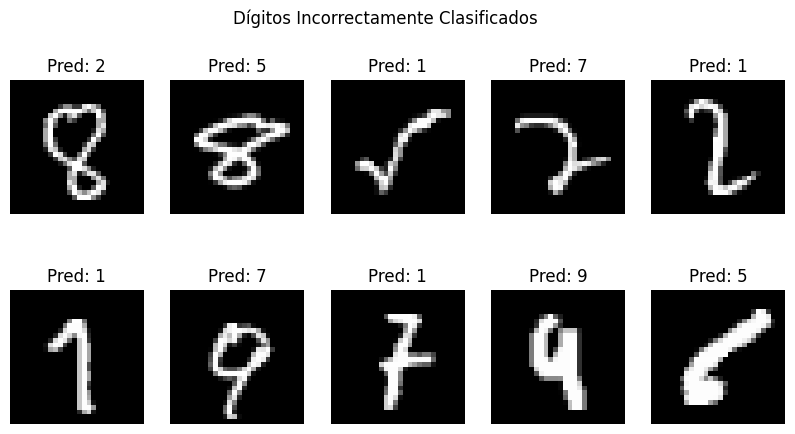

In [34]:
# Realizar predicciones en el conjunto de test
y_pred = knn.predict(x_test_split)

# Índices para dígitos correcta e incorrectamente clasificados
correctly_classified_indices = (y_pred == y_test_split)
incorrectly_classified_indices = (y_pred != y_test_split)

# Muestras de dígitos correcta e incorrectamente clasificados
correctly_classified_digits = x_test_split[correctly_classified_indices]
incorrectly_classified_digits = x_test_split[incorrectly_classified_indices]
incorrectly_classified_labels = y_pred[incorrectly_classified_indices]

# Función para visualizar los dígitos
def visualize_digits(digits, labels, title):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(digits[i].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {labels[i]}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualizar algunos dígitos correctamente clasificados
visualize_digits(correctly_classified_digits[:10], y_pred[:10], title='Dígitos Correctamente Clasificados')

# Visualizar algunos dígitos incorrectamente clasificados
visualize_digits(incorrectly_classified_digits[:10], incorrectly_classified_labels[:10], title='Dígitos Incorrectamente Clasificados')